In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('flexible solar cell.csv')
df

,?H(DOI),?L(DOI),Cell_area_measured,Cell_architecture,Substrate_stack_sequence,Perovskite_band_gap,Voc,Jsc,FF,PCE
0,0.06,0.06,0.1000,nip,E,1.60,1.01,21.15,0.5700,12.18
1,0.20,0.80,0.0756,nip,A,1.60,0.97,20.00,0.6900,13.30
2,0.30,0.53,0.0960,nip,A,1.53,1.10,19.30,0.7900,16.80
3,0.20,0.70,0.0400,nip,E,1.53,1.08,20.06,0.6725,13.03
4,0.40,0.33,1.2100,pin,F,1.53,1.00,21.46,0.7550,16.16
...,...,...,...,...,...,...,...,...,...,...
602,0.40,0.33,0.0177,pin,H,1.53,0.96,20.10,0.8300,16.00
603,0.20,0.60,0.1000,pin,A,1.50,1.01,19.80,0.7700,15.59
604,0.40,0.33,0.1000,pin,A,1.50,0.83,14.70,0.6100,7.62
605,0.40,0.33,0.1000,pin,A,1.53,0.96,16.73,0.6500,10.71


In [3]:
df['Substrate_stack_sequence'] = df['Substrate_stack_sequence'].replace({
    'A': 'PET | ITO',
    'B': 'PET',
    'C': 'SLG | ITO',
    'D': 'PET | IZO',
    'E': 'PEN | ITO',
    'F': 'PET | Ag-grid',
    'G': 'Ti',
    'H': 'Others'
})


In [4]:
df.columns

Index(['?H(DOI)', '?L(DOI)', 'Cell_area_measured', 'Cell_architecture',
       'Substrate_stack_sequence', 'Perovskite_band_gap', 'Voc', 'Jsc', 'FF',
       'PCE'],
      dtype='object')

In [5]:
new_columns = {'?H(DOI)':"HOMO",'?L(DOI)':"LUMO"}
df= df.rename(columns = new_columns)

In [6]:
df

,HOMO,LUMO,Cell_area_measured,Cell_architecture,Substrate_stack_sequence,Perovskite_band_gap,Voc,Jsc,FF,PCE
0,0.06,0.06,0.1000,nip,PEN | ITO,1.60,1.01,21.15,0.5700,12.18
1,0.20,0.80,0.0756,nip,PET | ITO,1.60,0.97,20.00,0.6900,13.30
2,0.30,0.53,0.0960,nip,PET | ITO,1.53,1.10,19.30,0.7900,16.80
3,0.20,0.70,0.0400,nip,PEN | ITO,1.53,1.08,20.06,0.6725,13.03
4,0.40,0.33,1.2100,pin,PET | Ag-grid,1.53,1.00,21.46,0.7550,16.16
...,...,...,...,...,...,...,...,...,...,...
602,0.40,0.33,0.0177,pin,Others,1.53,0.96,20.10,0.8300,16.00
603,0.20,0.60,0.1000,pin,PET | ITO,1.50,1.01,19.80,0.7700,15.59
604,0.40,0.33,0.1000,pin,PET | ITO,1.50,0.83,14.70,0.6100,7.62
605,0.40,0.33,0.1000,pin,PET | ITO,1.53,0.96,16.73,0.6500,10.71


In [7]:
from sklearn.preprocessing import LabelEncoder
le_cell_arch = LabelEncoder()
le_substrate_stack_sequence = LabelEncoder()
df['Cell_architecture'] = le_cell_arch.fit_transform(df['Cell_architecture'])
df['Substrate_stack_sequence'] = le_substrate_stack_sequence.fit_transform(df['Substrate_stack_sequence'])
df

,HOMO,LUMO,Cell_area_measured,Cell_architecture,Substrate_stack_sequence,Perovskite_band_gap,Voc,Jsc,FF,PCE
0,0.06,0.06,0.1000,0,1,1.60,1.01,21.15,0.5700,12.18
1,0.20,0.80,0.0756,0,4,1.60,0.97,20.00,0.6900,13.30
2,0.30,0.53,0.0960,0,4,1.53,1.10,19.30,0.7900,16.80
3,0.20,0.70,0.0400,0,1,1.53,1.08,20.06,0.6725,13.03
4,0.40,0.33,1.2100,1,3,1.53,1.00,21.46,0.7550,16.16
...,...,...,...,...,...,...,...,...,...,...
602,0.40,0.33,0.0177,1,0,1.53,0.96,20.10,0.8300,16.00
603,0.20,0.60,0.1000,1,4,1.50,1.01,19.80,0.7700,15.59
604,0.40,0.33,0.1000,1,4,1.50,0.83,14.70,0.6100,7.62
605,0.40,0.33,0.1000,1,4,1.53,0.96,16.73,0.6500,10.71


In [8]:
import pickle

pickle.dump(le_cell_arch,open('le_cell_arch.pkl','wb'))
pickle.dump(le_substrate_stack_sequence,open('le_substrate_stack_sequence.pkl','wb'))

In [9]:
df_pce = df[['HOMO', 'LUMO', 'Cell_area_measured', 'Cell_architecture',
       'Substrate_stack_sequence', 'Perovskite_band_gap','PCE']]
df_pce

,HOMO,LUMO,Cell_area_measured,Cell_architecture,Substrate_stack_sequence,Perovskite_band_gap,PCE
0,0.06,0.06,0.1000,0,1,1.60,12.18
1,0.20,0.80,0.0756,0,4,1.60,13.30
2,0.30,0.53,0.0960,0,4,1.53,16.80
3,0.20,0.70,0.0400,0,1,1.53,13.03
4,0.40,0.33,1.2100,1,3,1.53,16.16
...,...,...,...,...,...,...,...
602,0.40,0.33,0.0177,1,0,1.53,16.00
603,0.20,0.60,0.1000,1,4,1.50,15.59
604,0.40,0.33,0.1000,1,4,1.50,7.62
605,0.40,0.33,0.1000,1,4,1.53,10.71


In [10]:
y = df_pce.iloc[::,-1]
X = df_pce.iloc[:,:-1]

In [11]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X, y)

DecisionTreeRegressor()

In [12]:
y_pred =dtr.predict(X)
y_pred

array([12.18      , 13.3       , 17.15      , 13.03      , 16.16      ,
        6.58      ,  6.16      , 16.1       , 15.7       , 17.2       ,
       11.        , 14.6       , 10.9       ,  9.7       ,  7.8       ,
       10.544     , 10.544     , 10.544     , 10.544     , 10.544     ,
       14.4       , 14.85      , 14.85      , 11.26666667, 11.26666667,
       11.26666667, 17.15      , 17.7       , 16.8       , 17.3       ,
       15.        , 15.        , 15.        , 15.        ,  9.95      ,
        9.7       ,  9.8       , 14.015     , 14.015     ,  8.21      ,
        9.77      , 10.78      , 19.44      , 13.07      ,  7.3       ,
        7.95      , 13.        , 13.3       , 15.35      , 18.36      ,
       11.13      , 14.26      ,  7.81      , 14.37      , 14.37      ,
        1.1       ,  3.9       ,  3.9       , 11.5       , 11.5       ,
       10.1       , 10.1       , 16.8       , 19.2       , 18.1       ,
       14.26      , 11.6       , 16.8       , 17.3       , 17.5 

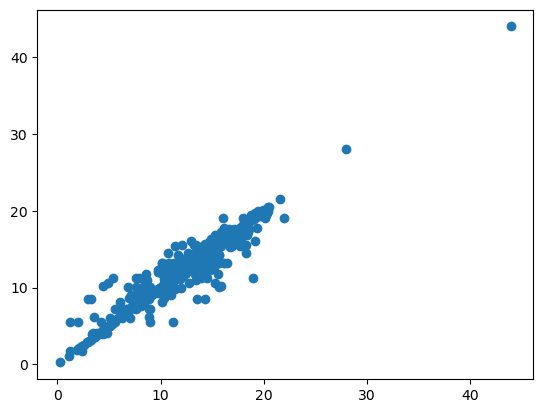

In [13]:
import matplotlib.pyplot as plt
plt.scatter(y,y_pred)

In [14]:
from sklearn.metrics import r2_score,mean_squared_error
score_dtr=r2_score(y, y_pred)
mse_dtr=mean_squared_error(y, y_pred)
print(score_dtr,mse_dtr)

0.9160983818667049 1.6979319577155412


In [15]:
import pickle

pickle.dump(dtr,open('pce.pkl','wb'))

In [16]:
!pip install xgboost


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [17]:
import xgboost as xgb
reg = xgb.XGBRegressor(
    n_estimators=100,
    reg_lambda=1,
    gamma=0,
    max_depth=4)

In [18]:
reg.fit(X,y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [19]:
y_pred_xgb =reg.predict(X)

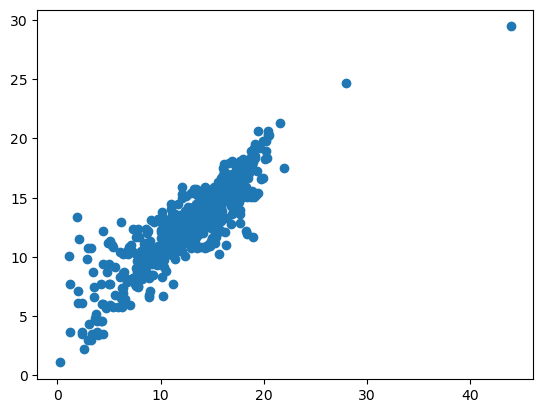

In [20]:
plt.scatter(y,y_pred_xgb)

In [21]:
from sklearn.metrics import r2_score,mean_squared_error
score_xgb=r2_score(y, y_pred_xgb)
mse_xgb=mean_squared_error(y, y_pred_xgb)
print(score_xgb,mse_xgb)

0.7487152910641809 5.085293314719277


In [22]:
df.columns

Index(['HOMO', 'LUMO', 'Cell_area_measured', 'Cell_architecture',
       'Substrate_stack_sequence', 'Perovskite_band_gap', 'Voc', 'Jsc', 'FF',
       'PCE'],
      dtype='object')

In [23]:
df_voc = df[['HOMO', 'LUMO', 'Cell_area_measured', 'Cell_architecture',
       'Substrate_stack_sequence', 'Perovskite_band_gap', 'Voc']]

In [24]:
df_voc

,HOMO,LUMO,Cell_area_measured,Cell_architecture,Substrate_stack_sequence,Perovskite_band_gap,Voc
0,0.06,0.06,0.1000,0,1,1.60,1.01
1,0.20,0.80,0.0756,0,4,1.60,0.97
2,0.30,0.53,0.0960,0,4,1.53,1.10
3,0.20,0.70,0.0400,0,1,1.53,1.08
4,0.40,0.33,1.2100,1,3,1.53,1.00
...,...,...,...,...,...,...,...
602,0.40,0.33,0.0177,1,0,1.53,0.96
603,0.20,0.60,0.1000,1,4,1.50,1.01
604,0.40,0.33,0.1000,1,4,1.50,0.83
605,0.40,0.33,0.1000,1,4,1.53,0.96


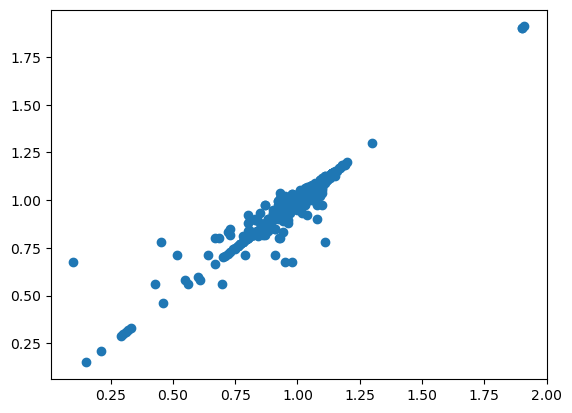

In [25]:
y = df_voc.iloc[::,-1]
X = df_voc.iloc[:,:-1]
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X, y)
y_pred =dtr.predict(X)
y_pred
import matplotlib.pyplot as plt
plt.scatter(y,y_pred)

In [26]:
from sklearn.metrics import r2_score,mean_squared_error
r2_score_voc=r2_score(y, y_pred)
mse_voc=mean_squared_error(y, y_pred)
print(r2_score_voc,mse_voc)

0.91240335162915 0.0021114277869302587


In [27]:
import pickle

pickle.dump(dtr,open('voc.pkl','wb'))

In [28]:
df_jsc = df[['HOMO', 'LUMO', 'Cell_area_measured', 'Cell_architecture',
       'Substrate_stack_sequence', 'Perovskite_band_gap', 'Jsc']]

In [29]:
df_jsc

,HOMO,LUMO,Cell_area_measured,Cell_architecture,Substrate_stack_sequence,Perovskite_band_gap,Jsc
0,0.06,0.06,0.1000,0,1,1.60,21.15
1,0.20,0.80,0.0756,0,4,1.60,20.00
2,0.30,0.53,0.0960,0,4,1.53,19.30
3,0.20,0.70,0.0400,0,1,1.53,20.06
4,0.40,0.33,1.2100,1,3,1.53,21.46
...,...,...,...,...,...,...,...
602,0.40,0.33,0.0177,1,0,1.53,20.10
603,0.20,0.60,0.1000,1,4,1.50,19.80
604,0.40,0.33,0.1000,1,4,1.50,14.70
605,0.40,0.33,0.1000,1,4,1.53,16.73


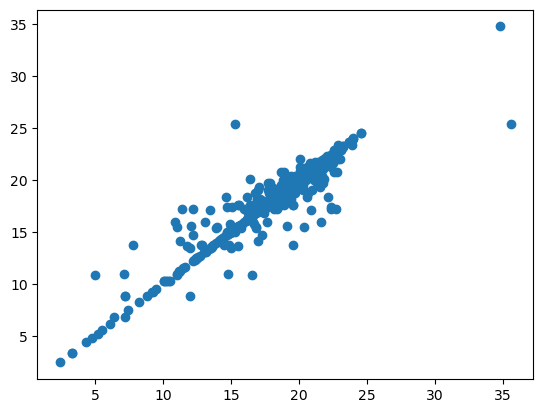

In [30]:
y = df_jsc.iloc[::,-1]
X = df_jsc.iloc[:,:-1]
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X, y)
y_pred =dtr.predict(X)
y_pred
import matplotlib.pyplot as plt
plt.scatter(y,y_pred)

In [31]:
from sklearn.metrics import r2_score,mean_squared_error
r2_score_jsc=r2_score(y, y_pred)
mse_jsc=mean_squared_error(y, y_pred)
print(r2_score_jsc,mse_jsc)

0.8939372020682487 1.5717056974190005


In [32]:
import pickle

pickle.dump(dtr,open('jsc.pkl','wb'))

In [33]:
df_ff = df[['HOMO', 'LUMO', 'Cell_area_measured', 'Cell_architecture',
       'Substrate_stack_sequence', 'Perovskite_band_gap','FF']]
df_ff

,HOMO,LUMO,Cell_area_measured,Cell_architecture,Substrate_stack_sequence,Perovskite_band_gap,FF
0,0.06,0.06,0.1000,0,1,1.60,0.5700
1,0.20,0.80,0.0756,0,4,1.60,0.6900
2,0.30,0.53,0.0960,0,4,1.53,0.7900
3,0.20,0.70,0.0400,0,1,1.53,0.6725
4,0.40,0.33,1.2100,1,3,1.53,0.7550
...,...,...,...,...,...,...,...
602,0.40,0.33,0.0177,1,0,1.53,0.8300
603,0.20,0.60,0.1000,1,4,1.50,0.7700
604,0.40,0.33,0.1000,1,4,1.50,0.6100
605,0.40,0.33,0.1000,1,4,1.53,0.6500


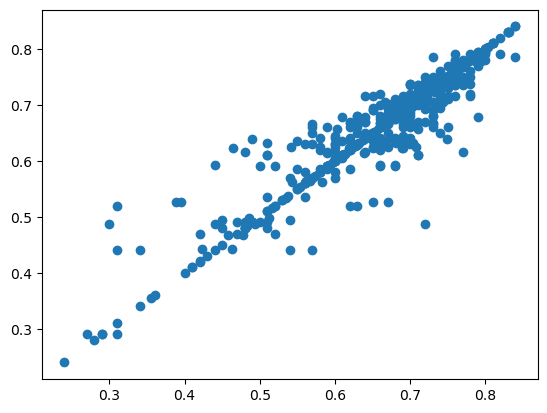

In [34]:
y = df_ff.iloc[::,-1]
X = df_ff.iloc[:,:-1]
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X, y)
y_pred =dtr.predict(X)
y_pred
import matplotlib.pyplot as plt
plt.scatter(y,y_pred)

In [35]:
from sklearn.metrics import r2_score,mean_squared_error
r2_score_ff=r2_score(y, y_pred)
mse_ff=mean_squared_error(y, y_pred)
print(r2_score_ff,mse_ff)

0.8794818402631035 0.0013416714085667215


In [36]:
import pickle

pickle.dump(dtr,open('ff.pkl','wb'))